## Biulding a custom visualization

In [4]:
%matplotlib inline
# Use the following data for this assignment:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interactive
sns.set()

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df = df.T #i transposed my dataframe so that i can use my years as column, that makes it easier for me
df

,1992,1993,1994,1995
0,-8941.531897,-51896.094813,152336.932066,-69708.439062
1,127788.667612,198350.518755,192947.128056,-13289.977022
2,-71887.743011,-123518.252821,389950.263156,-30178.390991
3,-79146.060869,-129916.759685,-93006.152024,55052.181256
4,425156.114501,216119.147314,100818.575896,152883.621657
...,...,...,...,...
3645,24185.008589,-37333.493572,-71861.846997,39937.199964
3646,-56826.729535,103019.841174,26375.113219,139472.114293
3647,-67319.766489,179746.127403,-29328.078384,59386.186379
3648,113377.299342,13455.493990,65858.761714,73362.229590


In [5]:
means = [df[1992].mean(), df[1993].mean(), df[1994].mean(), df[1995].mean()]#we create a list of all our means by year starting from 1992 to 1995
std_one = np.std(df[1992])#standard deviation of 1992 data
std_two = np.std(df[1993])#standard deviation of 1993 data
std_three = np.std(df[1994])#standard deviation of 1994 data
std_four = np.std(df[1995])#standard deviation of 1995 data
root = np.sqrt
std = np.std
#we need to calculate our mean standard deviation which is calculated as
#standard deviation of the mean = standard deviation of the data \squareroot of the sample size
#we are treating our data as a sample, so we need to get the margin of error

#the margin of error is calculated as the standard error multiplied by the tabulated value of the confidence interval which in a normal distribution is 1.96
error = [std_one/(3650**(0.5)),std_two/(3650**(.5)), std_three/(3650**(0.5)), std_four/(3650**(0.5))]
errors = [error[0]*1.96,error[1]*1.96,error[2]*1.96,error[3]*1.96]
errors

[6508.006279032519, 3191.8169886217424, 4553.27842212373, 2263.541606389295]


$$
standard error = \frac{standard deviation(data)}{ √(sample size(n))}
$$

$$
Error = {standard error } ✖ { confidence interval}
$$

Enter a value to compare with: 40000


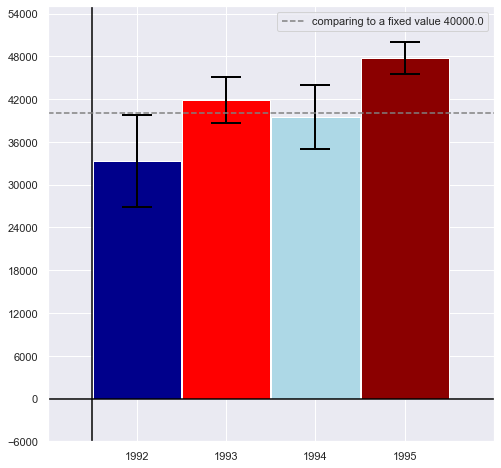

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(8,8))
mean_data= [33312.10747554433, 41861.85954107339, 39493.3049413989, 47743.55096926713]
y=float(input('Enter a value to compare with: '))
ranges = [y-mean_data[0], y-mean_data[1], y-mean_data[2], y-mean_data[3]]
colour = ['white' if x==0 else 'darkred' if -9001<x<-4000 else 'lightblue' if 1 < x <3000 else 'red' if -4000<x<-1 else 'Darkblue' for x in ranges]
xvals=range(len(mean_data))
plt.bar(xvals,mean_data, align="center", width=0.99,color=colour)
plt.xticks([0.0,1.0,2.0,3.0],[1992,1993,1994,1995])
plt.yticks([-6000,0,6000,12000,18000,24000,30000,36000,42000,48000,54000])
plt.ylim(-6000,55000)
plt.xlim(-1,4)
plt.axhline(0, color='black')
plt.axvline(-0.5,color='black', ls='-')
plt.axhline(y, color='grey', ls='--', label=f'comparing to a fixed value {y}')
plt.legend()

plt.errorbar(xvals,mean_data,yerr=errors, fmt='none', ecolor='black', elinewidth=2, alpha=1, capsize=15, capthick=2)
#plt.colorbar(mapable = 'none', cmap='plasma')
plt.show()
plt.savefig('stintractive.png', bbox_inches='tight', pad_inches=2)